In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import hockey.hockey_env as h_env

from rl_hockey.sac import SAC
from rl_hockey.common import utils

In [13]:
env = h_env.HockeyEnv(mode=h_env.Mode.NORMAL)

o_space = env.observation_space
ac_space = env.action_space

In [14]:
agent = SAC(o_space.shape[0], action_dim=ac_space.shape[0] // 2, noise='pink', max_episode_steps=250)
# agent.load("../../../results/hyperparameter_runs/2026-01-17_20-35-18/models/run_lr1e03_bs256_h128_128_128_4c1f51eb_20260117_203518_vec16.pt")
# agent.load("../../../results/sac_runs/2026-01-26_21-27-01/models/SAC_run_lr1e03_bs256_h128_128_128_4c1f51eb_20260126_212701_vec24_ep010000.pt")
agent.load("../../../minimal_runs/4/models/final.pt")

In [15]:
opponent = h_env.BasicOpponent(weak=True)

In [16]:
N = 100
win_count = 0
total_reward = 0

steps_per_ep = []
episodes = []

100%|██████████| 100/100 [00:23<00:00,  4.30it/s]


Average Reward over 100 episodes: 6.2671191660498815
Win Rate over 100 episodes: 0.77


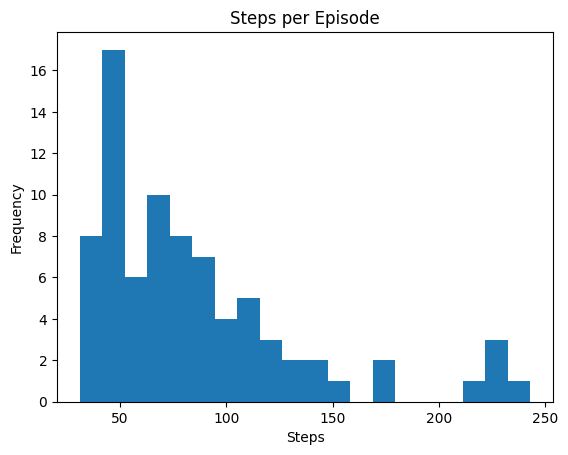

In [17]:
for i in tqdm(range(N)):
    state, _ = env.reset()

    episode = []
    for t in range(250):
        # env.render(mode="human")

        done = False
        action1 = agent.act(state.astype(np.float32), deterministic=True)
        action2 = opponent.act(env.obs_agent_two())

        (next_state, reward, done, trunc, info)  = env.step(np.hstack([action1, action2]))
        episode.append((state, next_state, reward, action1, action2))

        state = next_state

        total_reward += reward

        if done or trunc:
            steps_per_ep.append(t + 1)
            break
    
    if info['winner'] == 1:
        win_count += 1
        episodes.append(episode)

print(f"Average Reward over {N} episodes: {total_reward / N}")
print(f"Win Rate over {N} episodes: {win_count / N}")

plt.hist(steps_per_ep, bins=20)
plt.title("Steps per Episode")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()

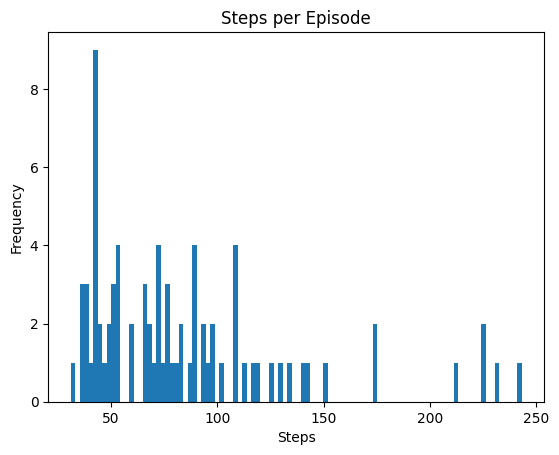

In [18]:
plt.hist(steps_per_ep, bins=100)
plt.title("Steps per Episode")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()

In [19]:
env.close()